# 3D Linear Transformations

A linear transformation in the 3-dimensional space keeps the lines and the plans equally spaced. This can be generalized to the n-dimensional case. 

Like the 2D case, in the 3D case a linear transformation is completely described by where $\hat{i}$, $\hat{j}$ and $\hat{k}$ (unary vector on the $z$ axis) goes.

A transformation matrix, in this 3D case, will be a $3 * 3$ matrix:

$$
\begin{pmatrix} 1 & 1 & 1 \\ 0 & 1 & 0 \\ -1 & 0 & 1 \end{pmatrix}
$$

The i-th column of the matrix represent where the i-th vector in the basis goes. 

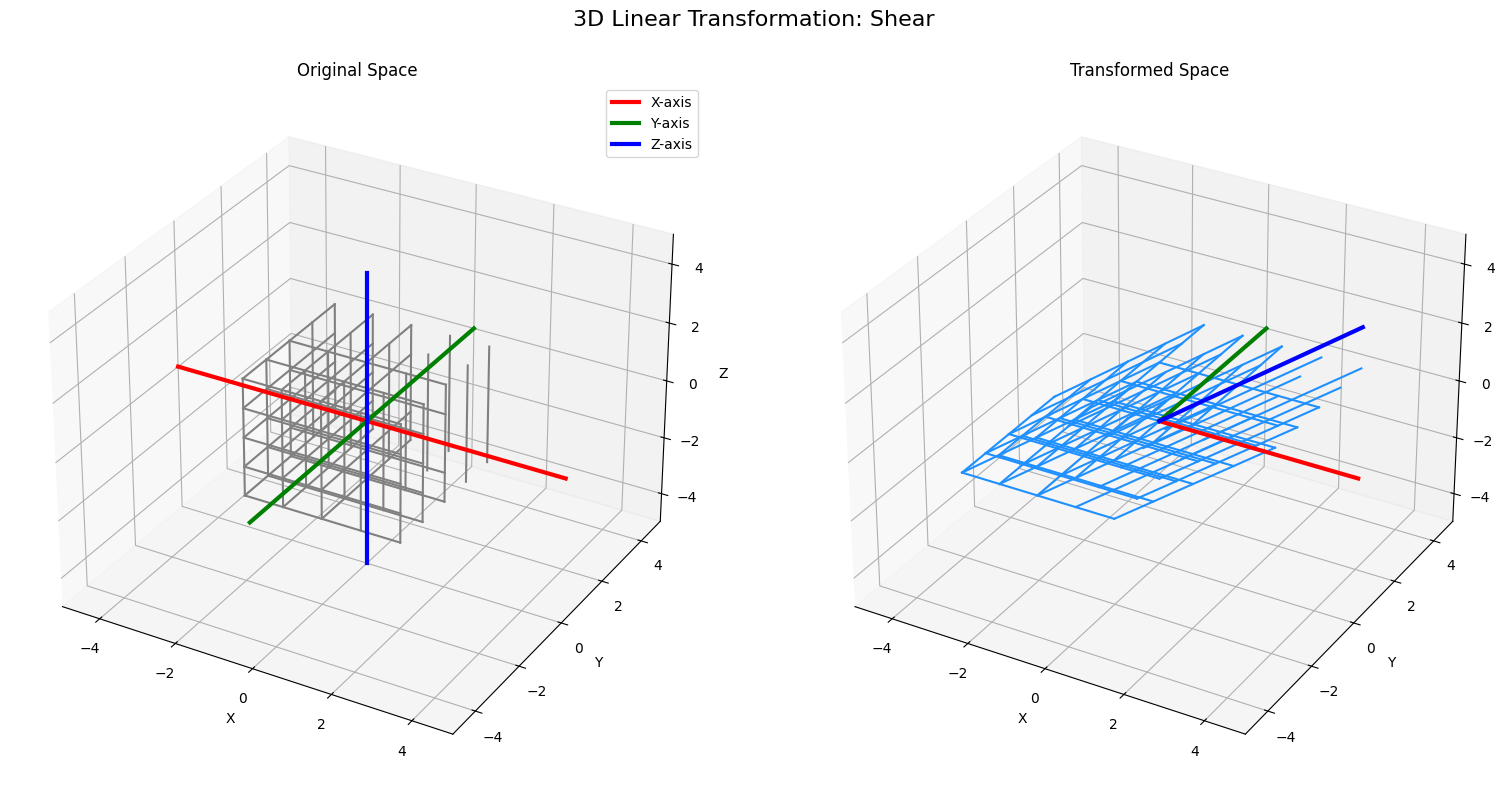

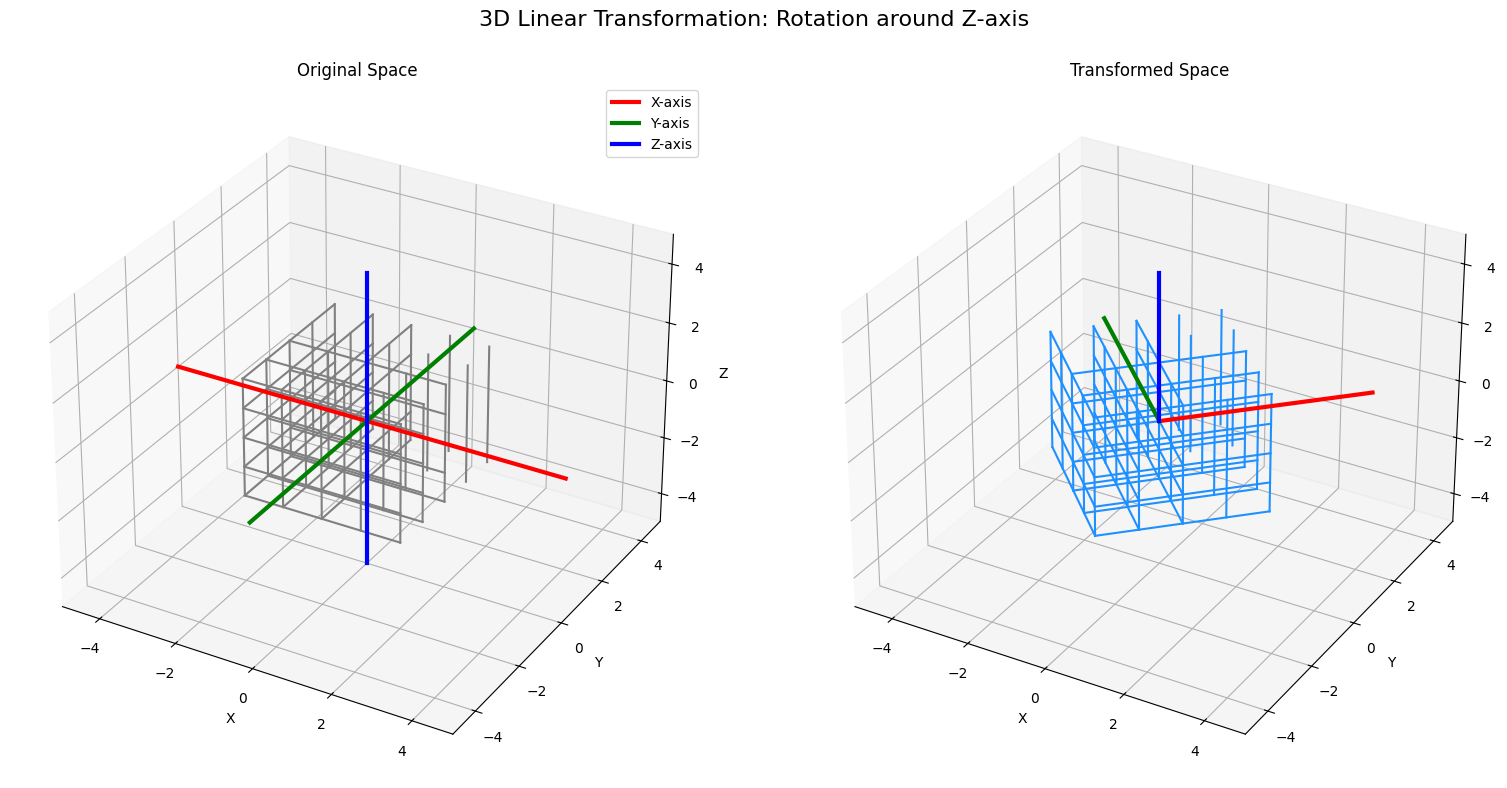

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grid_3d(ax, grid, color='gray', linestyle='-'):
    """Plots a 3D grid of points connected by lines."""
    # Plot lines along the first dimension
    for i in range(grid.shape[1]):
        for j in range(grid.shape[2]):
            ax.plot(grid[0, i, j, :], grid[1, i, j, :], grid[2, i, j, :], color=color, linestyle=linestyle)
    # Plot lines along the second dimension
    for i in range(grid.shape[0]):
        for j in range(grid.shape[2]):
            ax.plot(grid[0, i, :, j], grid[1, i, :, j], grid[2, i, :, j], color=color, linestyle=linestyle)
    # Plot lines along the third dimension
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            ax.plot(grid[0, :, i, j], grid[1, :, i, j], grid[2, :, i, j], color=color, linestyle=linestyle)


def visualize_transformation_3d(transformation_matrix, title):
    """
    Visualizes the effect of a linear transformation on a 3D grid.

    Args:
        transformation_matrix (np.ndarray): A 3x3 matrix representing the linear transformation.
        title (str): The title for the plot.
    """
    # Define the original grid of points
    x = np.linspace(-2, 2, 5)
    y = np.linspace(-2, 2, 5)
    z = np.linspace(-2, 2, 5)
    xx, yy, zz = np.meshgrid(x, y, z)
    original_grid = np.array([xx, yy, zz])

    # Apply the linear transformation to each point on the grid
    points = original_grid.reshape(3, -1)
    transformed_points = transformation_matrix @ points
    transformed_grid = transformed_points.reshape(original_grid.shape)

    # --- Plotting ---
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(title, fontsize=16)

    # Plot Original Grid
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title("Original Space")
    plot_grid_3d(ax1, original_grid, color='gray')
    # Highlight the axes
    ax1.plot([-5, 5], [0, 0], [0, 0], 'r-', lw=3, label='X-axis') # x-axis
    ax1.plot([0, 0], [-5, 5], [0, 0], 'g-', lw=3, label='Y-axis') # y-axis
    ax1.plot([0, 0], [0, 0], [-5, 5], 'b-', lw=3, label='Z-axis') # z-axis
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-5, 5)
    ax1.set_zlim(-5, 5)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # Plot Transformed Grid
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title("Transformed Space")
    plot_grid_3d(ax2, transformed_grid, color='dodgerblue')
    # Highlight the transformed axes
    origin = np.zeros(3)
    transformed_x_axis = transformation_matrix @ np.array([5, 0, 0])
    transformed_y_axis = transformation_matrix @ np.array([0, 5, 0])
    transformed_z_axis = transformation_matrix @ np.array([0, 0, 5])
    ax2.plot([origin[0], transformed_x_axis[0]], [origin[1], transformed_x_axis[1]], [origin[2], transformed_x_axis[2]], 'r-', lw=3)
    ax2.plot([origin[0], transformed_y_axis[0]], [origin[1], transformed_y_axis[1]], [origin[2], transformed_y_axis[2]], 'g-', lw=3)
    ax2.plot([origin[0], transformed_z_axis[0]], [origin[1], transformed_z_axis[1]], [origin[2], transformed_z_axis[2]], 'b-', lw=3)
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    ax2.set_zlim(-5, 5)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Example 1: Shear Transformation in 3D ---
# This transformation slants the grid along the x-axis based on the z-coordinate.
shear_matrix_3d = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
])
visualize_transformation_3d(shear_matrix_3d, "3D Linear Transformation: Shear")


# --- Example 2: Rotation Transformation in 3D ---
# This transformation rotates the grid by 45 degrees around the Z-axis.
angle = np.pi / 4  # 45 degrees
rotation_matrix_3d = np.array([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle),  np.cos(angle), 0],
    [0, 0, 1]
])
visualize_transformation_3d(rotation_matrix_3d, "3D Linear Transformation: Rotation around Z-axis")